Sentiment analysis is the process of understanding the opinions and emotions of people in a given data. In this task, we will use machine learning to classify tweets as positive or negative. 
The first step to solving this problem is to collect and label the tweets. We can use existing datasets or create a new one from scratch. After we have the dataset, we need to feature engineer it. This involves selecting the most relevant features from the dataset and transforming them into numerical values. The next step is to select a machine-learning algorithm for the classification task


In [ ]:
# import libraries
import pandas as pd
import numpy as np

# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics

# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 

RANDOM_SEED = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print(train_df.shape)
train_df.head()

(16363, 3)


,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


This code is a function that cleans tweets by removing URLs, usernames, hashtags, special characters and extra whitespace. It takes in a text as an argument and applies regular expression patterns to remove unwanted elements. Finally, it is applied to the train and test datasets.

In [ ]:
# import the necessary libraries 
import re 

# define a function to clean the tweets 
def clean_tweets(text): 
  text = re.sub(r"http\S+", "", text) # remove URLs 
  text = re.sub(r"@\S+", "", text) # remove usernames 
  text = re.sub(r"#\S+", "", text) # remove hashtags 
  text = re.sub(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ", text) # remove special characters 
  text = re.sub(r"\s{2,}", " ", text) # remove extra whitespace 
  return text 

# apply the function to the dataset 
train_df['text'] = train_df['text'].apply(clean_tweets)
test_df['text'] = test_df['text'].apply(clean_tweets)

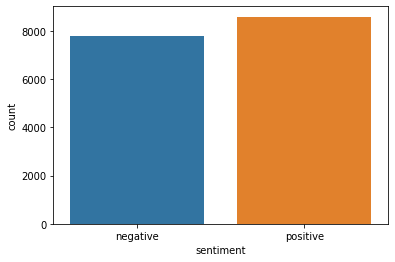

In [ ]:
# Summarise class details
sns.countplot(x=train_df['sentiment'])

As we can see in the above output, there are 20,000 rows or reviews in this data set.

The data set consists of 3 columns,
- Id - Autogenerated incrementing number as row Id
- Text - Review text
- Sentiment - Label for sentiment (positive, negative)

In [ ]:
# drop the rows where at least one element is missing
train_df = train_df.dropna()
test_df = test_df.dropna()

In [ ]:
print(f'Number of entries: {len(train_df)}')
print(f'Number of entries: {len(test_df)}')


Number of entries: 16363
Number of entries: 1000


Tokenization is the process of breaking up a stream of text into meaningful elements called tokens. Tokenization is an important part of many text-processing tasks, such as natural language processing, information retrieval, and text mining. Tokens can be individual words, phrases, or even whole sentences.

This code is used to tokenize the text in the 'Text' column of the train_df data frame. The first step is to iterate through each row in the 'Text' column and convert the text to tokens using the word_tokenize function. These tokens are stored in a list (list1_tokenised_text). The second step is to join the tokens back together as one sentence and store them in a new list (list1_tokenised_sentences). Finally, a new column called 'Tokenised_Text1' is created on the train_df data frame containing the tokenised text from the lists.

In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
list1_tokenised_text = [word_tokenize(text) for text in train_df['text']]
print(list1_tokenised_text[:2])

list1_tokenised_sentences = [' '.join(tokens) for tokens in list1_tokenised_text]
print(list1_tokenised_sentences[:2])

# add new column to data frame
train_df['Tokenised_Text1'] = list1_tokenised_sentences
train_df.head()

[['Sooo', 'SAD', 'I', 'will', 'miss', 'you', 'here', 'in', 'San', 'Diego', '!', '!', '!'], ['my', 'boss', 'is', 'bullying', 'me']]
['Sooo SAD I will miss you here in San Diego ! ! !', 'my boss is bullying me']


,id,text,sentiment,Tokenised_Text1
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me,negative,my boss is bullying me
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone
3,358bd9e861,"Sons of , why couldn`t they put them on the r...",negative,"Sons of , why couldn ` t they put them on the ..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...



This code is tokenizing text from the 'Text' column in a dataframe called test_df. It is looping through each row in the 'Text' column and uses the word_tokenize() function to convert the text into tokens. The tokens are then added to a new list, and the list is joined together to form a string of tokenized text. The tokenized text is added to a new column in the test_df dataframe called 'Tokenised_Text2'.

In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens
list2_tokenised_text = [word_tokenize(text) for text in test_df['text']]
print(list2_tokenised_text[:2])

list2_tokenised_sentences = [' '.join(tokens) for tokens in list2_tokenised_text]
print(list2_tokenised_sentences[:2])

# add new column to data frame
test_df['Tokenised_Text2'] = list2_tokenised_sentences
test_df.head()

[['Shanghai', 'is', 'also', 'really', 'exciting', '(', 'precisely', 'skyscrapers', 'galore', ')', 'Good', 'tweeps', 'in', 'China', '(', 'SH', ')', '(', 'BJ', ')'], ['Recession', 'hit', 'Veronique', 'Branquinho', ',', 'she', 'has', 'to', 'quit', 'her', 'company', ',', 'such', 'a', 'shame', '!']]
['Shanghai is also really exciting ( precisely skyscrapers galore ) Good tweeps in China ( SH ) ( BJ )', 'Recession hit Veronique Branquinho , she has to quit her company , such a shame !']


,id,text,Tokenised_Text2
0,96d74cb729,Shanghai is also really exciting (precisely s...,Shanghai is also really exciting ( precisely s...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t..."
2,01082688c6,happy bday!,happy bday !
3,33987a8ee5,I like it!!,I like it ! !
4,726e501993,that`s great!! weee!! visitors!,that ` s great ! ! weee ! ! visitors !


## Text normalisation

Under text normalisation, we discussed about 3 techniques; lower casing, stemming and lemmatisation.

Lower casing can be easily done by setting an argument in vectorizer.

Among stemming and lemmatisation, we will focus on lemmatisation in this tutorial because it is the more organised procedure.

Lemmatization is the process of converting a word to its base form. This is done by analyzing the context of the word and removing any affixes (prefixes or suffixes) to return the base form of the word. It is a form of normalization for words that are used in natural language processing tasks.

Tokenization is the process of breaking down a large body of text into smaller pieces called tokens. These tokens can then be further analyzed to gain insight into the text. Tokenization is commonly used in natural language processing (NLP) tasks such as sentiment analysis, part-of-speech tagging, and word sense disambiguation.

This code is used to perform lemmatization on a list of tokenized text. This code begins by creating a WordNetLemmatizer object and an empty list to store the lemmatized sentences. It then iterates through each list of tokens and lemmatizes them using the WordNetLemmatizer object. The lemmatized words are then joined together with space and added to the list created earlier. The list is then added as a new column to the data frame. Finally, the head of the data frame is printed to show the new column.

In [ ]:
wnl_train = WordNetLemmatizer()

list1_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list1_tokenised_text:
  lemma1_words = [wnl_train.lemmatize(word) for word in tokens]
  lemma1_sentence = ' '.join(lemma1_words)
  list1_lemmatised_sentences.append(lemma1_sentence)
  
print(list1_lemmatised_sentences[:2])

# add new column to data frame
train_df['Lemmatised_Text1'] = list1_lemmatised_sentences

train_df.head()

['Sooo SAD I will miss you here in San Diego ! ! !', 'my bos is bullying me']


,id,text,sentiment,Tokenised_Text1,Lemmatised_Text1
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me,negative,my boss is bullying me,my bos is bullying me
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of , why couldn`t they put them on the r...",negative,"Sons of , why couldn ` t they put them on the ...","Sons of , why couldn ` t they put them on the ..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


This code lemmatizes a list of tokenized text. First, the WordNetLemmatizer() is initialized, and an empty list is created for the lemmatized sentences. Then, the code iterates through each list of tokens and lemmatizes the tokens using the WordNetLemmatizer() function. Finally, a new column named 'Lemmatised_Text2' is added to the dataframe containing the lemmatized sentences.

In [ ]:
wnl_test = WordNetLemmatizer()

list2_lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list2_tokenised_text:
  lemma2_words = [wnl_test.lemmatize(word) for word in tokens]
  lemma2_sentence = ' '.join(lemma2_words)
  list2_lemmatised_sentences.append(lemma2_sentence)
  
print(list2_lemmatised_sentences[:2])

# add new column to data frame
test_df['Lemmatised_Text2'] = list2_lemmatised_sentences

test_df.head(20)

['Shanghai is also really exciting ( precisely skyscraper galore ) Good tweeps in China ( SH ) ( BJ )', 'Recession hit Veronique Branquinho , she ha to quit her company , such a shame !']


,id,text,Tokenised_Text2,Lemmatised_Text2
0,96d74cb729,Shanghai is also really exciting (precisely s...,Shanghai is also really exciting ( precisely s...,Shanghai is also really exciting ( precisely s...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...","Recession hit Veronique Branquinho , she has t...","Recession hit Veronique Branquinho , she ha to..."
2,01082688c6,happy bday!,happy bday !,happy bday !
3,33987a8ee5,I like it!!,I like it ! !,I like it ! !
4,726e501993,that`s great!! weee!! visitors!,that ` s great ! ! weee ! ! visitors !,that ` s great ! ! weee ! ! visitor !
5,261932614e,I THINK EVERYONE HATES ME ON HERE lol,I THINK EVERYONE HATES ME ON HERE lol,I THINK EVERYONE HATES ME ON HERE lol
6,afa11da83f,"soooooo wish i could, but im in school and my...","soooooo wish i could , but im in school and my...","soooooo wish i could , but im in school and my..."
7,24c92644a4,My bike was put on hold should have known that...,My bike was put on hold should have known that...,My bike wa put on hold should have known that ...
8,5c1e0b61a1,"I`m in VA for the weekend, my youngest son tur...","I ` m in VA for the weekend , my youngest son ...","I ` m in VA for the weekend , my youngest son ..."
9,504e45d9d9,Its coming out the socket I feel like my phone...,Its coming out the socket I feel like my phone...,Its coming out the socket I feel like my phone...


In [ ]:
# save updated data frame to a file
# This step is optional for the main flow. But by saving data to a file you can analyse the preprocessed text output more deeply. 
train_df.to_csv('/content/reviews_preprocessed.csv', index=False)

train_df

,id,text,sentiment,Tokenised_Text1,Lemmatised_Text1
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me,negative,my boss is bullying me,my bos is bullying me
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of , why couldn`t they put them on the r...",negative,"Sons of , why couldn ` t they put them on the ...","Sons of , why couldn ` t they put them on the ..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...
...,...,...,...,...,...
16358,b78ec00df5,enjoy ur night,positive,enjoy ur night,enjoy ur night
16359,4eac33d1c0,wish we could come see u on Denver husband lo...,negative,wish we could come see u on Denver husband los...,wish we could come see u on Denver husband los...
16360,4f4c4fc327,I`ve wondered about rake to The client has ma...,negative,I ` ve wondered about rake to The client has m...,I ` ve wondered about rake to The client ha ma...
16361,f67aae2310,Yay good for both of you Enjoy the break you ...,positive,Yay good for both of you Enjoy the break you p...,Yay good for both of you Enjoy the break you p...


In [ ]:
train_df.head()

,id,text,sentiment,Tokenised_Text1,Lemmatised_Text1
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,Sooo SAD I will miss you here in San Diego ! ! !,Sooo SAD I will miss you here in San Diego ! ! !
1,088c60f138,my boss is bullying me,negative,my boss is bullying me,my bos is bullying me
2,9642c003ef,what interview! leave me alone,negative,what interview ! leave me alone,what interview ! leave me alone
3,358bd9e861,"Sons of , why couldn`t they put them on the r...",negative,"Sons of , why couldn ` t they put them on the ...","Sons of , why couldn ` t they put them on the ..."
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feeding for the baby are fun when he is al...


Stop word removal is a process of removing commonly used words (e.g., "the," "a," "an," and "is"), which are usually referred to as stop words, from a text. Stop words are usually considered irrelevant to the meaning of a sentence and are often removed to improve search engine accuracy and the overall readability of a text.

This code creates a set of English stopwords using the stopwords library from the NLTK library. Stopwords are words that are typically filtered out of natural language processing tasks such as text analysis. The set of stopwords can then be used to filter out words from a text in order to identify meaningful words and phrases.

In [ ]:
# get English stopwords
stop_words = set(stopwords.words('english')) 
print(stop_words)

{'weren', "shan't", 'nor', 'their', "she's", 'they', 'aren', "shouldn't", 'having', 'again', "you've", 'it', 'theirs', 'when', 'while', "mustn't", "needn't", 'had', 'the', 'hers', 'further', 'if', 'other', 'll', 'been', "that'll", "you'd", 'itself', 'more', 'ourselves', 'we', 'its', 'on', 'our', 'very', 'ain', 'couldn', 'needn', 'i', 'what', 'those', 'such', 'isn', 'were', 'did', 'yourselves', 'or', 'no', 'won', 'down', 'mightn', 'myself', 'whom', 'for', 'against', 'and', 'into', 'up', "don't", "hadn't", 'y', 'mustn', 'during', 'your', 'yourself', 're', 'off', 'yours', 'which', 'all', 'was', 'have', 'but', 'them', 'below', 'here', 'hasn', 'under', 'my', "should've", 'didn', 'am', 'who', 'has', 'after', 'each', 'then', "weren't", 'himself', 'you', 'is', 'than', 'at', 'not', "it's", 'ma', 'can', 'few', "couldn't", 'these', 'being', 'wasn', 'some', 'a', 'out', 'about', 'hadn', "hasn't", 'doing', 'd', 'there', 'an', 'once', "wouldn't", "you're", 'ours', 'between', 'in', 'will', 'haven', 'm

This code is used to split the data into training and validation sets. The train_test_split function is used to split the training data into two datasets: X_train_text, X_val_text and y_train, y_val. The test_size argument is used to specify the proportion of the data to be used for the validation set, in this case 0.3. The random_state argument is used to specify a random seed to ensure the same split is used each time the code is run. 

The same process is repeated for the tokenised text (X_train_tokenised_text and X_val_tokenised_text) and lemmatised text (X_train_lemmatised_text and X_val_lemmatised_text). 

The class_list variable is then used to specify the classes to be used for plotting the confusion matrix.

In [ ]:
# use raw text
X_train_text, X_val_text, y_train, y_val = train_test_split(train_df['text'], train_df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train, y_val = train_test_split(train_df['Tokenised_Text1'], train_df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'validation data set size: {len(X_val_tokenised_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(train_df['Lemmatised_Text1'], train_df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


This code is used to evaluate the performance of a classification model. The evaluate() function takes three parameters: actuals, predictions and class_names. The accuracy score is calculated using the metrics.accuracy_score() function. The confusion matrix is calculated using the metrics.confusion_matrix() function, which takes the actuals, predictions and class_names as parameters. The plot_confusion_matrix() function is then used to plot the confusion matrix. Finally, the accuracy and the confusion matrix are returned by the evaluate() function.

In [ ]:
# method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FN'], ['FP', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix

## SVM
Support Vector Machines (SVMs) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. The goal of an SVM is to find the best possible hyperplane that separates different classes of data points in an n-dimensional space, where n is the number of features.

This code defines a function to train and predict using the Support Vector Machine (SVM) classifier. The function takes in the training and validation data and labels (X_train, X_val, y_train, y_val, class_names) and builds a linear SVM model. The model is then used to make predictions on the validation data and the performance is evaluated with an accuracy and confusion matrix. The accuracy and confusion matrix are printed and the trained model is returned.

In [ ]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

## Logistic Regression
Logistic regression is a type of statistical analysis used in machine learning that is used to predict the probability of a certain outcome based on a set of independent variables. Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression, which is used to predict a continuous outcome, logistic regression is used to predict a binary outcome. Logistic regression is often used to determine whether a customer will purchase a product, whether an email is a spam, or whether a tumour is malignant or benign.

This code creates a logistic regression model and uses it to make predictions on a test dataset. The evaluate function is used to evaluate the accuracy of the model and the plot_confusion_matrix function is used to plot the confusion matrix. The accuracy and the confusion matrix are then printed out.

In [ ]:
from sklearn.linear_model import LogisticRegression
def get_logistic_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model

  #clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED)
  clf = LogisticRegression(random_state=RANDOM_SEED)
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

## Decision Tree
Decision trees are a type of supervised machine-learning algorithm used for both classification and regression tasks. They are a tree-like graph or model of decisions and their possible consequences. It is one way to visually and explicitly represent decisions and decision-making. The branches of the tree represent different decisions, and the leaves represent the end results. The goal of a decision tree is to maximize the accuracy of the prediction by minimizing the deviation from the true value.

This code is a method to train and predict using a Decision Tree Classifier. First, it creates a Decision Tree Classifier object with a random seed. Then, it fits the Decision Tree Classifier model with the X_train and y_train data. After that, it makes predictions on the X_val data and evaluates the accuracy and confusion matrix of the predictions. Finally, it prints out the accuracy and plots the confusion matrix and returns the classifier.

In [ ]:
# method to train and predict using Decision Tree
def get_dt_predictions(X_train, X_val, y_train, y_val, class_list):
  # build model
  clf = tree.DecisionTreeClassifier(random_state=RANDOM_SEED)
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_list)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_list)

  return clf

### Model M1

* Data preprocessing - lower casing, punctuation removal
* Features - term occurrence vector (1-grams)
* Algorithm - SVM

This code is used to build a support vector machine classifier to classify text data. First, it uses the CountVectorizer class to create a vectorizer object and fit it to the training data. Then, it converts the text data into numeric vectors using the vectorizer object. Finally, it calls the get_svm_predictions function to train a support vector machine classifier using the converted data and predict labels for the validation data.

Accuracy: 0.8598492564677124


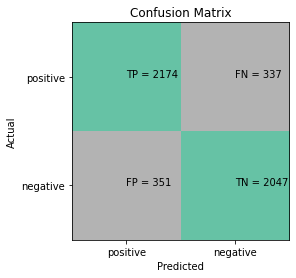

In [ ]:
vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m1 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

### Model M2

* Data preprocessing - lower casing, punctuation removal
* Features - tf-idf vector (1-grams)
* Algorithm - SVM

This code is used to train a Support Vector Machine (SVM) model to classify text data. The code first imports the necessary libraries such as TfidfVectorizer and SVC. Then it splits the data into training and validation sets. The next step is to use the TfidfVectorizer to convert the text data into numeric vectors which can be used by the SVM. Finally, the get_svm_predictions function is used to train the SVM on the training data and make predictions on the validation data using the SVC class from the sklearn library. The predictions are then returned as a matrix of probabilities for each class.

Accuracy: 0.8679975555102872


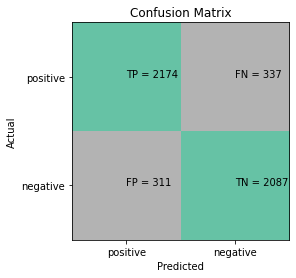

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

### Model M3

* Data preprocessing - lower casing, punctuation removal, tokenisation(NLTK)
* Features - tf-idf vector (1-grams)
* Algorithm - SVM

This code is performing natural language processing to prepare text data for use in a support vector machine (SVM) classification model. It first splits the dataset into a training and validation set. It then tokenizes the text data in the training and validation sets, meaning it splits the text into individual words. Then it uses a TfidfVectorizer to convert the tokenized text data into numeric vectors. Finally, it uses the get_svm_predictions function to fit an SVM model to the training data and make predictions on the validation data.

Accuracy: 0.8669790181299654


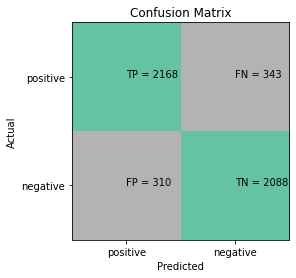

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m3 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

### Model M4

* Data preprocessing - lower casing, punctuation removal, lemmatisation(WordNet)
* Features - tf-idf vector (1-grams)
* Algorithm - SVM

This code is used to train and test a Support Vector Machine (SVM) model using lemmatized text data from a dataset. The code first loads in the dataset and separates the text data from the labels. It then performs lemmatization on the text data using the NLTK WordNetLemmatizer. The TfidfVectorizer is then used to convert the text data into numeric vectors. Finally, the get_svm_predictions function is called to train and test the SVM model on the lemmatized text data.

Accuracy: 0.8698309227948666


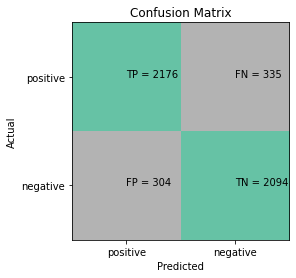

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

### Model M5

* Data preprocessing - lower casing, punctuation removal, tokenisation(NLTK), stop word removal
* Features - tf-idf vector (1-grams)
* Algorithm - SVM


This code is used to train a support vector machine (SVM) to classify text data. First, it imports the necessary libraries (numpy, pandas, sklearn, etc). Next, it reads in the training and validation data for the text classification task. Then, it preprocesses the text by tokenizing it, removing stop words (common words like 'the', 'a', etc.) and stemming the words. 

Next, it uses the TfidfVectorizer to convert the text data into numeric vectors. This vectorizer assigns weights to each word in the text based on its frequency in the dataset. Finally, it calls the get_svm_predictions() function to train a SVM model on the vectorised text data and make predictions on the validation set.

Accuracy: 0.8588307190873905


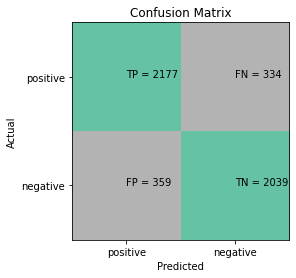

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m5 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

### Model M6

* Data preprocessing - lower casing, punctuation removal, lemmatisation(WordNet), stop word removal
* Features - tf-idf vector (1-grams)
* Algorithm - SVM

This code is used to create a Support Vector Machine (SVM) model, which is a supervised learning algorithm used to classify data into different classes. The code begins by defining the stop_words which are words that should be ignored when processing the text. It then creates a TfidfVectorizer object which is used to convert the text into numerical vectors. The X_train_lemmatised_text and X_val_lemmatised_text are then converted to numerical vectors using the vectorizer. After this, the get_svm_predictions() function is called which uses the X_train, X_val, y_train, y_val and class_list to create the SVM model. Finally, the model is used to make predictions on the data.

Accuracy: 0.8576084742310043


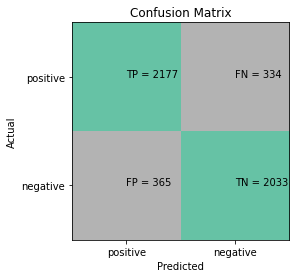

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stop_words)  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m6 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

### Model M7

* Data preprocessing - lower casing, punctuation removal, tokenisation(NLTK), stop word removal
* Features - tf-idf vector (1-grams)
* Algorithm - Logistic Regression

This code is used to create a logistic regression model. It begins by loading the data and splitting it into train and validation sets. It then uses the TfidfVectorizer() to convert the text data into numeric vectors. Finally, it uses the get_logistic_predictions() function to fit the logistic model on the training data and then evaluate it on the validation data. The get_logistic_predictions() function returns the predictions made by the model.

Accuracy: 0.8637196985129354


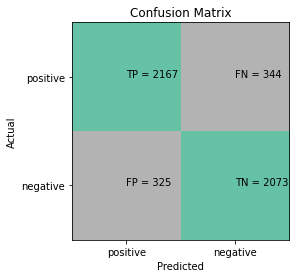

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m7 = get_logistic_predictions(X_train, X_val, y_train, y_val, class_list)

### Model M8

* Data preprocessing - lower casing, punctuation removal, lemmatisation(WordNet)
* Features - tf-idf vector (1-grams)
* Algorithm - Logistic Regression


This code is creating a logistic regression model to classify text data. The first step is to tokenize the text data. This is done by splitting the text into individual words, or tokens. Then, a TF-IDF vectorizer is used to convert the text data into numeric vectors. This vectorizer is used to fit the training data, and then the training and validation data are transformed into numeric vectors. Finally, the logistic regression model is trained on the training data and used to make predictions on the validation data. The model's performance is then evaluated using the class list.

Accuracy: 0.8645345284171929


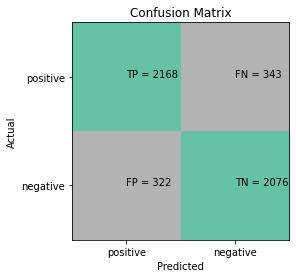

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m8 = get_logistic_predictions(X_train, X_val, y_train, y_val, class_list)

### Model M9

* Data preprocessing - lower casing, punctuation removal, tokenisation(NLTK)
* Features - tf-idf vector (1-grams)
* Algorithm - Logisctic Regression

This code is creating a logistic regression model to predict labels for text data. It first creates a TfidfVectorizer() object which is a type of feature extraction used to transform text data into numeric vectors. The vectorizer is then fitted to the training data set X_train_lemmatised_text. The training and validation data sets are then converted to numeric vectors using the vectorizer. Finally, a logistic regression model is created using the get_logistic_predictions() function. The function takes in the training and validation sets, as well as the labels for the training and validation sets and a list of classes for the labels. The model is then used to make predictions for the validation set.

Accuracy: 0.865145650845386


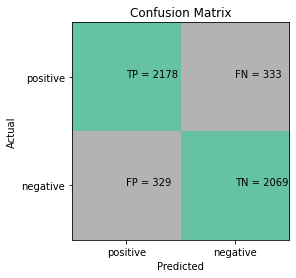

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m9 = get_logistic_predictions(X_train, X_val, y_train, y_val, class_list)

### Decision Tree
### Model M10


* Data preprocessing - lower casing, punctuation removal
* Features - tf-idf vector (1-grams)
* Algorithm - DecisionTreeClassifier

This code is used to create a Decision Tree classifier for a text classification problem. The first step is to define a TfidfVectorizer and fit it to the training data. The TfidfVectorizer is used to convert the text data into numeric vectors. Then the get_dt_predictions function is called to train the Decision Tree classifier on the training data and make predictions on the validation data. Finally, the classifier's performance is evaluated on the validation set.

Accuracy: 0.8022000407414952


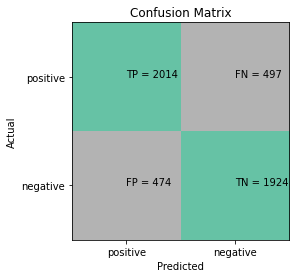

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m9 = get_dt_predictions(X_train, X_val, y_train, y_val, class_list)

# Predictions

In [ ]:
test_reviews = pd.read_csv('/content/test.csv')

In [ ]:
test_reviews.head()

,id,text
0,96d74cb729,Shanghai is also really exciting (precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
2,01082688c6,happy bday!
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!
4,726e501993,that`s great!! weee!! visitors!


Testing with the best model

Accuracy: 0.8698309227948666


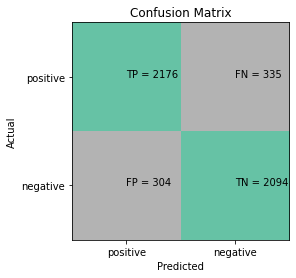

In [ ]:
vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

This code is using a pre-trained machine learning model, m4, to predict sentiment labels for a set of test reviews. It first uses a vectorizer to transform the text of the reviews into numerical features. Then it uses the predict function from the model to generate predictions for the sentiment labels. The predictions are printed once they have been generated.

In [ ]:
X_test = vectorizer.transform(test_reviews['text'])
predictions = m4.predict(X_test)
print(predictions)

['positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'negative' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'posit

In [ ]:
# Code to predict and display sentiments from test dataset

predictions = m4.predict(X_test)

# Write the sentiments to a csv file
import csv

with open('sentiments.csv', mode='w') as predictions_file:
    predictions_writer = csv.writer(predictions_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    for prediction in predictions:
        predictions_writer.writerow([prediction])

In [ ]:
test_reviews.head(5)

,id,text
0,96d74cb729,Shanghai is also really exciting (precisely -...
1,eee518ae67,"Recession hit Veronique Branquinho, she has to..."
2,01082688c6,happy bday!
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!
4,726e501993,that`s great!! weee!! visitors!


In [ ]:
df1 = pd.DataFrame(test_reviews)

In [ ]:
df1 = df1.assign(prediction = predictions)

In [ ]:
df1.head(20)

,id,text,prediction
0,96d74cb729,Shanghai is also really exciting (precisely -...,positive
1,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
2,01082688c6,happy bday!,positive
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive
4,726e501993,that`s great!! weee!! visitors!,positive
5,261932614e,I THINK EVERYONE HATES ME ON HERE lol,negative
6,afa11da83f,"soooooo wish i could, but im in school and my...",negative
7,24c92644a4,My bike was put on hold...should have known th...,negative
8,5c1e0b61a1,"I`m in VA for the weekend, my youngest son tur...",negative
9,504e45d9d9,Its coming out the socket I feel like my phon...,negative


In [ ]:
pred = df1[['id','prediction']]

In [ ]:
pred.to_csv('saved_dataframe.csv')

In [ ]:
saved = pd.read_csv('/content/saved_dataframe.csv')

In [ ]:
saved.head(5)

,Unnamed: 0,id,prediction
0,0,96d74cb729,positive
1,1,eee518ae67,negative
2,2,01082688c6,positive
3,3,33987a8ee5,positive
4,4,726e501993,positive


This code is used to create a JSON file from a dataframe. It takes the dataframe, reads the id and prediction columns and stores it in a list. The list is then written in a JSON file. This JSON file is then used as a submission file to the dataset.

In [ ]:
import json

import pandas as pd

#test_file_path = "data/test-predictions.csv"
df_test = saved
df_test = df_test[["id", "prediction"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['prediction']})

print(data[0:2])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))

[{'id': '96d74cb729', 'prediction': 'positive'}, {'id': 'eee518ae67', 'prediction': 'negative'}]
